Documentation [Click Here](https://docs.google.com/document/d/1aAJ3H4pOnnwGHbruFc__MGjnrvC3GQCBnrRG9EXfkWI/edit)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv')
data


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [5]:
data.head(5)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [6]:
data.shape

(1340, 7)

In [7]:
data.drop(['CASENUM'],axis=1,inplace=True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [8]:
data.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [9]:
data.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
#data['CLMSEX']=data['CLMSEX'].fillna()
#data['CLMINSUR']=data['CLMINSUR'].fillna()

In [11]:
data.CLMSEX.value_counts().index[0]

1.0

In [12]:
#Creating a user-defined function for imputing the missing values
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
data.apply(lambda col:fill_na(col))
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

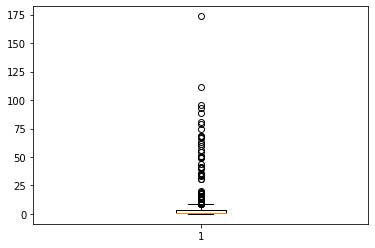

In [13]:
plt.boxplot(data.LOSS)
plt.show()

-->Data Entry mistake
1. Outliers also missing values --> Imputation
2. Winsorization --> Outliers are replaced with next small value

In [14]:
#iloc-row indices,column indices
data.iloc[1:,1:]

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
5,1.0,1.0,0.0,35.0,0.309
...,...,...,...,...,...
1335,0.0,1.0,0.0,10.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [15]:
# Split the data into i/p and o/p
X=data.iloc[:,1:]
y=data.ATTORNEY

In [16]:
#split the data into training and testing
#build the model on training data and check the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [17]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [18]:
#Predicting on train data
# Syntaxx: objectname:predict(i/p)
y_train_pred=reg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [19]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_train,y_train_pred)
conf


array([[315, 170],
       [108, 345]], dtype=int64)

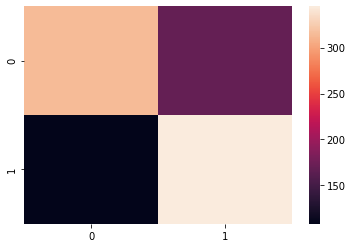

In [20]:
sns.heatmap(conf)

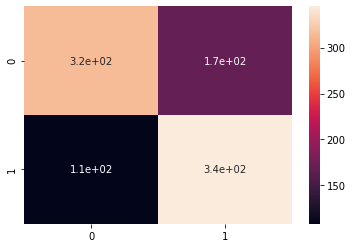

In [21]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)

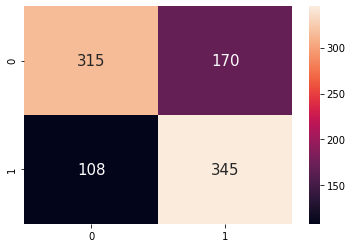

In [22]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'15'})


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7036247334754797

In [24]:
conf[0][0]
conf[0][1]

170

In [25]:
#
print('true_positive=',conf[0][0])
print('false_positive=',conf[0][1])
print('false_negative=',conf[1][0])
print('true_negative=',conf[1][1])



true_positive= 315
false_positive= 170
false_negative= 108
true_negative= 345


In [26]:
true_positive=conf[0][0]
false_positive=conf[0][0]
false_negative=conf[1][0]

In [27]:
Precision=true_positive/(true_positive+false_positive)
Precision

0.5

In [28]:
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6699029126213593

In [29]:
Recall=true_positive/(true_positive + false_negative)
Recall 

0.7446808510638298

In [30]:
true_negative=conf[0][0]
false_positive=conf[0][1]
false_negative=conf[1][0]
true_positive=conf[1][1]

In [31]:
Precision=true_positive/(true_positive + false_positive)
Precision

0.6699029126213593

In [32]:
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6699029126213593